# Statistical Analysis

Based on: https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.stats.multitest as smm

In [2]:
iris = datasets.load_iris()
names = iris.get('target_names')
print(names)

['setosa' 'versicolor' 'virginica']


In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = [names[t] for t in iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


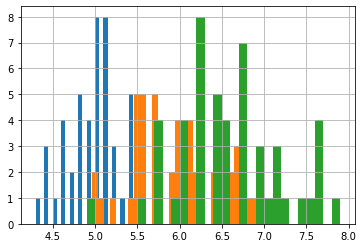

In [6]:
sepal_length = 'sepal length (cm)'
plt.figure()
for class_number in np.unique(iris.target):
    df[sepal_length].iloc[np.where(iris.target == class_number)[0]].hist(bins=30)
plt.show()
plt.close()

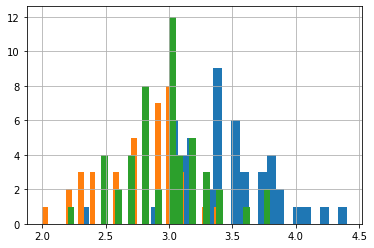

In [7]:
sepal_width = 'sepal width (cm)'
plt.figure()
for class_number in np.unique(iris.target):
    df[sepal_width].iloc[np.where(iris.target == class_number)[0]].hist(bins=30)
plt.show()
plt.close()

In [8]:
for name in names:
    print("{}: {}".format(name, stats.shapiro(df[sepal_width][df['target'] == name])))

setosa: (0.97171950340271, 0.2715264856815338)
versicolor: (0.9741330742835999, 0.33798879384994507)
virginica: (0.9673910140991211, 0.1809043288230896)


In [9]:
stats.bartlett(df[sepal_width][df['target'] == names[0]], 
               df[sepal_width][df['target'] == names[1]], 
               df[sepal_width][df['target'] == names[2]])

BartlettResult(statistic=2.0910752014392338, pvalue=0.35150280041580323)

In [10]:
stats.levene(df[sepal_length][df['target'] == names[0]], 
             df[sepal_length][df['target'] == names[1]], 
             df[sepal_length][df['target'] == names[2]])

LeveneResult(statistic=6.35272002048269, pvalue=0.0022585277836218586)

In [11]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [12]:
iris = datasets.load_iris()
names = iris.get('target_names')
print(names)

['setosa' 'versicolor' 'virginica']


In [13]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = [names[t] for t in iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
df.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


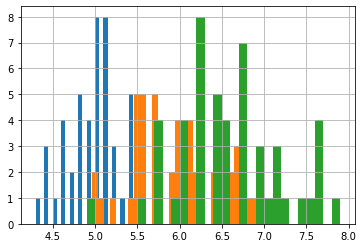

In [15]:
sepal_length = 'sepal length (cm)'
plt.figure()
for class_number in np.unique(iris.target):
    df[sepal_length].iloc[np.where(iris.target == class_number)[0]].hist(bins=30)
plt.show()
plt.close()

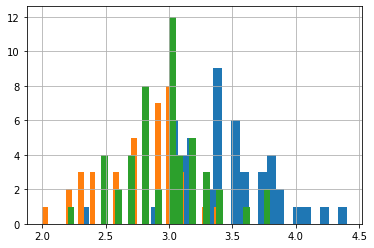

In [16]:
sepal_width = 'sepal width (cm)'
plt.figure()
for class_number in np.unique(iris.target):
    df[sepal_width].iloc[np.where(iris.target == class_number)[0]].hist(bins=30)
plt.show()
plt.close()

In [17]:
for name in names:
    print("{}: {}".format(name, stats.shapiro(df[sepal_width][df['target'] == name])))

setosa: (0.97171950340271, 0.2715264856815338)
versicolor: (0.9741330742835999, 0.33798879384994507)
virginica: (0.9673910140991211, 0.1809043288230896)


In [18]:
df_0 = df[df['target'] == names[0]]
df_1 = df[df['target'] == names[1]]
df_2 = df[df['target'] == names[2]]

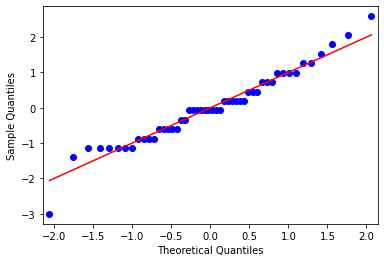

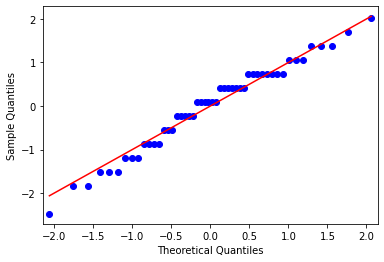

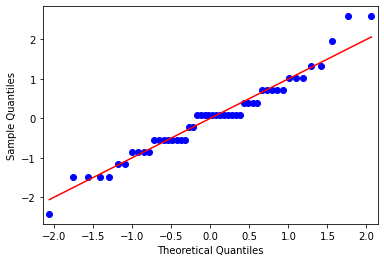

In [19]:
sm.qqplot(df_0[sepal_width], line ='s', fit=True) 
plt.show() 
sm.qqplot(df_1[sepal_width], line ='s', fit=True) 
plt.show() 
sm.qqplot(df_2[sepal_width], line ='s', fit=True) 
plt.show() 

In [20]:
stats.bartlett(df_0[sepal_width][df['target'] == names[0]], 
               df_1[sepal_width][df['target'] == names[1]], 
               df_2[sepal_width][df['target'] == names[2]])

BartlettResult(statistic=2.0910752014392338, pvalue=0.35150280041580323)

In [21]:
# TODO: Bug in source's code, should be sepal_width (sepal_length does already reject null hypothesis!)
stats.levene(df[sepal_width][df['target'] == names[0]], 
             df[sepal_width][df['target'] == names[1]], 
             df[sepal_width][df['target'] == names[2]])

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

In [22]:
stats.f_oneway(df[sepal_width][df['target'] == names[0]], 
               df[sepal_width][df['target'] == names[1]], 
               df[sepal_width][df['target'] == names[2]])

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

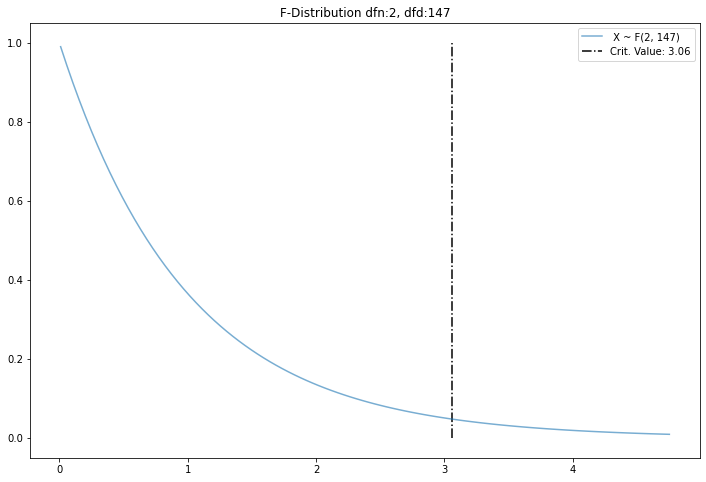

In [23]:
from scipy.stats import f, norm
def plot_f_distrubiton():
    # Set figure 
    plt.figure(figsize=(12, 8))
    
    # Set degrees of freedom
    dfn, dfd = 2, 147
    rejection_reg = f.ppf(q=.95, dfn=dfn, dfd=dfd)
    mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
    
    x = np.linspace(f.ppf(0.01, dfn, dfd), 
                    f.ppf(0.99, dfn, dfd), 100)
    
    # Plot values
    plt.plot(x, f.pdf(x, dfn, dfd), alpha=0.6, 
             label=' X ~ F({}, {})'.format(dfn, dfd))
    plt.vlines(rejection_reg, 0.0, 1.0, 
               linestyles="dashdot", label="Crit. Value: {:.2f}".format(rejection_reg))
    plt.legend()
    plt.title('F-Distribution dfn:{}, dfd:{}'.format(dfn, dfd))
plot_f_distrubiton();

In [24]:
df_test = df.rename(columns={sepal_width: 'test'})
df_test.head()

,sepal length (cm),test,petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
results = ols("test ~ C(target)", data=df_test).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   test   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     49.16
Date:                Sun, 03 May 2020   Prob (F-statistic):           4.49e-17
Time:                        22:02:28   Log-Likelihood:                -49.366
No. Observations:                 150   AIC:                             104.7
Df Residuals:                     147   BIC:                             113.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.4280      0.048     71.359      0.000       3.333       3.523
C(target)[T.versicolor]    -0.6580      0.068     -9.685      0.000      -0.792      -0.524
C(target)[T.virginica]     -0.4540      0.068     -6.683      0.000      -0.588      -0.320
==============================================================================
Omnibus:                        1.920   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.632
Skew:                           0.027   Prob(JB):                        0.442
Kurtosis:                       3.508   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
reject, pvals_corrected, alphacSidak, alphacBonf = smm.multipletests(results.pvalues, .05, method='b')

for rej, val, name in zip(reject, pvals_corrected, names):
    print("name={:<10} - reject={} - p-value={:.4} ".format(name, rej, val))

name=setosa     - reject=True - p-value=1.712e-115 
name=versicolor - reject=True - p-value=5.497e-17 
name=virginica  - reject=True - p-value=1.362e-09 
